In [8]:
from bvp import our_own_bvp_solve
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

np.set_printoptions(precision=3)

In [2]:
# The following is the system for the midterm.
gamma = 5 / 3
v_plus = 3 / 5
v_star = gamma / (gamma + 2)
e_minus = (gamma + 2) * (v_plus - v_star) / 2 / gamma / (gamma + 1)

# ODE
f = lambda x, y: np.array([y[0] * (y[0] - 1) + gamma * (y[1] - y[0] * e_minus),
                           y[0] * (-(y[0] - 1) ** 2 / 2 + y[1] - e_minus + gamma * e_minus * (y[0] - 1))])

a = 0
b = 20
dim = 2

# Choose an appropriate number of points at which to colocate.
n = 40

In [20]:
# fixed points
source = np.array([1, e_minus])
sink = np.array([0, 0])
saddle = np.array([v_plus, 3 * e_minus])

In [18]:
# These conditions start at the source and move to the sink.
source_to_sink_bc = lambda ya, yb: np.array([
    *(ya[0] - source),          # start at source
    *(yb[0] - sink),            # finish at the sink
    yb[1][0] + yb[1][1] * 0.33  # specify slope at sink
])

# These conditions start at the source and move to the saddle.
source_to_saddle_bc = lambda ya, yb: np.array([
    *(ya[0] - source),         # start at source
    *(yb[0] - saddle),         # finish at saddle
    yb[1][0] + yb[1][1] * 0.6  # specify slope at saddle
])

# These conditions start at the saddle and move to the sink.
saddle_to_sink_bc = lambda ya, yb: np.array([
    *(ya[0] - saddle),          # start at saddle
    *(yb[0] - sink),            # finish at sink
    ya[1][0] + ya[1][1] * -0.3  # specify slope at saddle
])

def get_saddle_to_sink_bc(saddle_hat):
    return lambda ya, yb: np.array([
        *(ya[0] - saddle_hat),          # start at saddle
        *(yb[0] - sink),            # finish at sink
        ya[1][0] + ya[1][1] * -0.3  # specify slope at saddle
    ])

In [21]:
# initial guess for solution
y0 = np.zeros((n + 1, dim))

# solve for connecting orbits between the three fixed points
source_to_sink_solution = our_own_bvp_solve(f, a, b, n, y0, dim, source_to_sink_bc)
source_to_saddle_solution = our_own_bvp_solve(f, a, b, n, y0, dim, source_to_saddle_bc)
saddle_to_sink_solution = our_own_bvp_solve(f, a, b, n, y0, dim, saddle_to_sink_bc)

C:\Users\T440\Desktop\boundaryvalue\bvp.py:45: RankWarning: The fit may be poorly conditioned
  cf0 = np.polynomial.chebyshev.chebfit(np.linspace(a, b, len(y0)), y0, n)


root finding failed


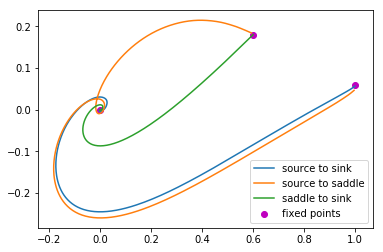

In [22]:
# plotting
dom = np.linspace(a, b, 1000)
plt.plot(source_to_sink_solution[0](dom), source_to_sink_solution[1](dom), label='source to sink')
plt.plot(source_to_saddle_solution[0](dom), source_to_saddle_solution[1](dom), label='source to saddle')
plt.plot(saddle_to_sink_solution[0](dom), saddle_to_sink_solution[1](dom), label='saddle to sink')
plt.scatter([1, 0, 3 / 5], [3 / 50, 0, 9 / 50], color='m', label='fixed points')
plt.legend()
plt.show()

C:\Users\T440\Desktop\boundaryvalue\bvp.py:45: RankWarning: The fit may be poorly conditioned
  cf0 = np.polynomial.chebyshev.chebfit(np.linspace(a, b, len(y0)), y0, n)


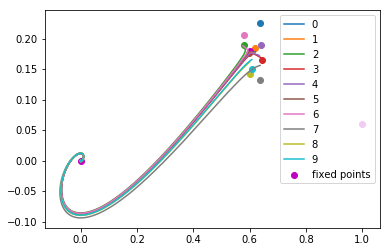

In [25]:
# plotting
dom = np.linspace(a, b, 1000)
for i in range(10):
    saddle_hat = saddle + 0.1*(np.random.random((2,)) - 0.5)
    bc_i = get_saddle_to_sink_bc(saddle_hat)
    sol = our_own_bvp_solve(f, a, b, n, y0, dim, bc_i)
    plt.plot(sol[0](dom), sol[1](dom), label="{}".format(i))
    plt.scatter(saddle_hat[0], saddle_hat[1])

plt.scatter([1, 0, 3 / 5], [3 / 50, 0, 9 / 50], color='m', label='fixed points')
plt.legend()
plt.show()

source: [1.   0.06]
y0: (41, 2)
[0.964 0.086]


C:\Users\T440\Desktop\boundaryvalue\bvp.py:45: RankWarning: The fit may be poorly conditioned
  cf0 = np.polynomial.chebyshev.chebfit(np.linspace(a, b, len(y0)), y0, n)


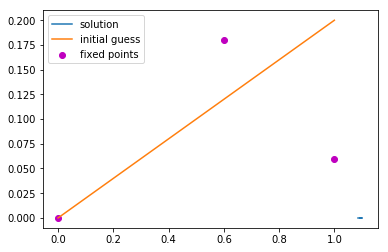

In [28]:
y0 = np.stack(
    (np.linspace(1, 0, 41), np.linspace(0.2, 0, 41)),
    axis=1
)
# y0 = 0*np.ones((41,2))

print("source:",source)
print("y0:",y0.shape)
for i in range(1):
    source_i = source - 0.1*(np.random.random((2,)) - 0.5)
    print(source_i)
    bc_i = lambda ya, yb: np.array([
        ya[0] - source[0],
        ya[1] - source[1]
    ])
    sol = our_own_bvp_solve(f, a, b, n, y0, dim, bc_i)
    plt.plot(sol[0](dom), sol[1](dom), label="solution")
plt.scatter([1, 0, 3 / 5], [3 / 50, 0, 9 / 50], color='m', label='fixed points')
plt.plot(y0[:,0], y0[:,1], label="initial guess")
plt.legend()
plt.show()